In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import jdatetime

df= pd.read_csv('Animation_Movies.csv')

numeric_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']



In [95]:
b_non_zero_mean = df['budget'][df['budget'] != 0].mean()

df['budget'].replace(0,b_non_zero_mean,inplace=True)


r_non_zero_mean = df['revenue'][df['revenue'] != 0].mean()

df['revenue'].replace(0,r_non_zero_mean,inplace=True)

v_non_zero_mean = df['vote_average'][df['vote_average'] != 0].mean()

df['vote_average'].replace(0,v_non_zero_mean,inplace=True)


v2_non_zero_mean = df['vote_count'][df['vote_count'] != 0].mean()

df['vote_count'].replace(0,v2_non_zero_mean,inplace=True)

df2 = pd.DataFrame(columns=['Name','Type','Range','Min','Max','Mean','Mode','Median'])

for i in range(len(numeric_columns)):
    df2.loc[i]={'Name':numeric_columns[i],'Type':df[numeric_columns[i]].dtype,'Range':f"{df[numeric_columns[i]].min()} :{df[numeric_columns[i]].max()} ",'Min':df[numeric_columns[i]].min(),'Max':df[numeric_columns[i]].max(),'Mean':df[numeric_columns[i]].mean(),'Mode':df[numeric_columns[i]].mode(),'Median':df[numeric_columns[i]].median()}


display(df2)

C:\Users\shaahin\AppData\Local\Temp\ipykernel_24572\4130288416.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].replace(0,b_non_zero_mean,inplace=True)
C:\Users\shaahin\AppData\Local\Temp\ipykernel_24572\4130288416.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Name,Type,Range,Min,Max,Mean,Mode,Median
0,budget,float64,1.0 :260000000.0,1.0,2.600000e+08,1.866362e+07,"0 1.866362e+07 Name: budget, dtype: float64",1.866362e+07
1,revenue,float64,1.0 :1450026933.0,1.0,1.450027e+09,8.799786e+07,"0 8.799786e+07 Name: revenue, dtype: float64",8.799786e+07
2,runtime,int64,0 :3720,0.0,3.720000e+03,2.090141e+01,"0 0 Name: runtime, dtype: int64",7.000000e+00
3,vote_average,float64,0.5 :10.0,0.5,1.000000e+01,6.376701e+00,"0 6.376701 Name: vote_average, dtype: float64",6.376701e+00
4,vote_count,float64,1.0 :19463.0,1.0,1.946300e+04,9.913720e+01,"0 99.137201 Name: vote_count, dtype: float64",9.913720e+01


Q1 : 18663624.360573925 , Q4 : 260000000.0


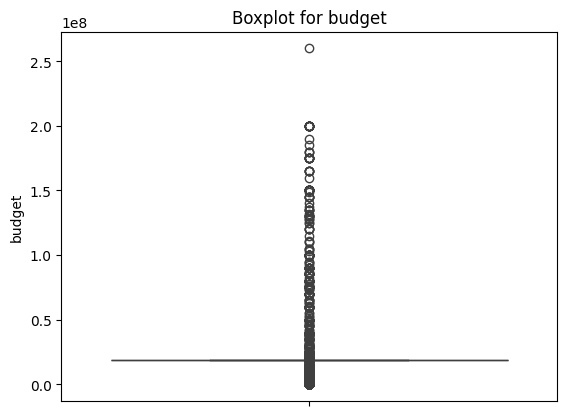

Q1 : 87997857.45636363 , Q4 : 1450026933.0


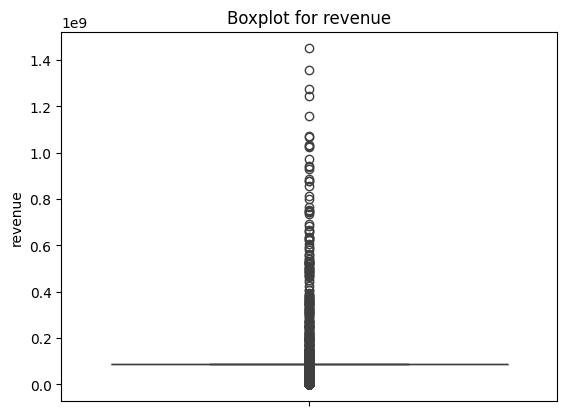

Q1 : 3.0 , Q4 : 3720.0


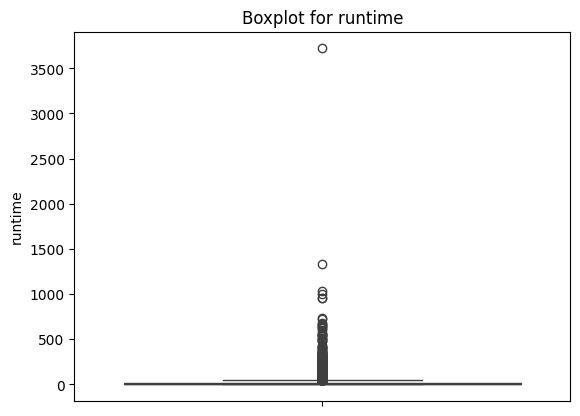

Q1 : 6.376700794100965 , Q4 : 10.0


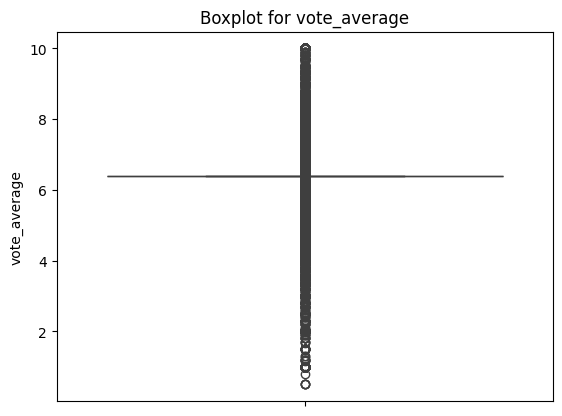

Q1 : 6.0 , Q4 : 19463.0


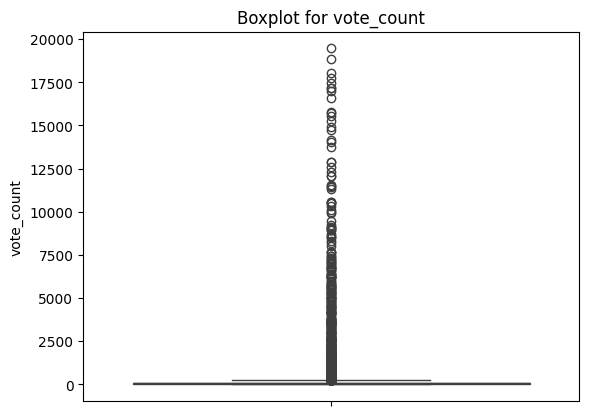

In [96]:
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q4= df[column].quantile(1)  
    print(f"Q1 : {Q1} , Q4 : {Q4}")
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


از روی باکس پلات بنظر میرسد بودجه و درآمد رابطه مستقیم دارند

کمبود بودجه همواره باعث کمبود درآمد میشود ولی زیاد بودن آن لزوم باعث درآمد بیشتر نمیشود

In [97]:



# مرحله ۱: بررسی مقادیر گم‌شده
missing_values = df[['revenue', 'budget', 'release_date']].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing values and their percentages:\n", missing_percentage)

# مرحله ۲: شناسایی داده‌های پرت
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

# شناسایی داده‌های پرت در revenue و budget
outliers_revenue = detect_outliers(df, 'revenue')
outliers_budget = detect_outliers(df, 'budget')

print("Outliers in revenue:\n")
display( outliers_revenue)
print("Outliers in budget:\n")
display( outliers_budget)

# مرحله ۳: بررسی ناسازگاری‌ها و خطاها در date_release
# چک می‌کنیم که تاریخ انتشار از زمان حال و یا زمان آینده نباشد
from datetime import datetime
today = datetime.today()

invalid_dates = df[pd.to_datetime(df['release_date'], errors='coerce') > today]
print("Invalid dates in date_release:\n", invalid_dates)

invalid_budget = df[df['budget'] < 0]
invalid_revenue = df[df['revenue'] < 0]
print(f"Invalid budget values:\n")
display(invalid_budget) 
print(f"Invalid revenue values:\n")
display(invalid_revenue)

# نمایش خلاصه‌ای از کیفیت داده‌ها
summary = {
    "missing_values": missing_percentage,
    "outliers_revenue": len(outliers_revenue),
    "outliers_budget": len(outliers_budget),
    "invalid_dates": len(invalid_dates),
    "invalid_budget": len(invalid_budget)   ,
    "invalid_revenue": len(invalid_revenue),
}
print("Data quality summary:\n", summary)




inconsistent_budget_revenue = df[(df['budget'].isna()) & (~df['revenue'].isna())]
display(f"Inconsistent rows between budget and revenue:\n{inconsistent_budget_revenue}")

inconsistent_release_date_imdb_id = df[(df['release_date'].isna()) & (~df['imdb_id'].isna())]
display(f"Inconsistent rows between release_date and revenue:\n{inconsistent_release_date_imdb_id}")


df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df['release_year'] = df['release_date'].dt.year


decade_bins = pd.cut(df['release_year'], bins=np.arange(1900, 2030, 10))
decade_distribution = df.groupby(decade_bins).size()
print(f"Number of movies in each decade:\n{decade_distribution}")



valid_budget_ratio = df['budget'].notna().mean() * 100
valid_revenue_ratio = df['revenue'].notna().mean() * 100
valid_date_release_ratio = df['release_date'].notna().mean() * 100

print(f"Valid budget ratio: {valid_budget_ratio:.2f}%")
print(f"Valid revenue ratio: {valid_revenue_ratio:.2f}%")
print(f"Valid date_release ratio: {valid_date_release_ratio:.2f}%")

# پیشنهادات برای بهبود کیفیت داده‌ها:
# 1. پر کردن مقادیر گم‌شده با میانگین یا میانه‌ی داده‌ها برای ستون‌های budget و revenue.
# 2. استفاده از اطلاعات تاریخی معتبر برای پر کردن مقادیر گم‌شده در date_release.
# 3. حذف یا تصحیح مقادیر پرت (outliers) مانند مقادیر منفی در ستون‌های budget و revenue.


Missing values and their percentages:
 revenue         0.000000
budget          0.000000
release_date    4.113967
dtype: float64
Outliers in revenue:



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922000,19463.000000,Released,2015-06-09,857611174.0,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949000,18857.000000,Released,2009-05-28,735099082.0,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824000,18061.000000,Released,2003-05-30,940335536.0,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222000,17742.000000,Released,2017-10-27,800526015.0,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078000,17446.000000,Released,2008-06-22,521311860.0,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51192,646484,HX-01,6.376701,99.137201,Released,2017-04-14,12000.0,37,False,/gxBfMtkIleLXovWfEkD7rcaYx49.jpg,...,en,HX-01,HX-01 is an animated short film by hexeosis. A...,0.600,/6aJifSuuOkqSUqodpMXQoRjZNiV.jpg,An Animated Short Film by hexeosis,Animation,Kickstarter,United States of America,NaN
51209,644920,Bulmaca Kulesi: Dev Kuşun Gizemi,6.376701,99.137201,Released,2019-10-15,149485.0,0,False,NaN,...,tr,Bulmaca Kulesi: Dev Kuşun Gizemi,NaN,0.600,/8W27z2xtQtbQaOAXuVlk71h2FS4.jpg,NaN,"Animation, Adventure","CGV Mars Dağıtım, TRT",Turkey,Turkish
51451,642399,Fear of the Moth,6.376701,99.137201,Released,2018-05-18,2.0,8,False,NaN,...,en,Fear of the Moth,"The girl is scared of a moth, so she tries to ...",0.600,/6y6s5mdnFyloleQjfk0XVXHo8Vt.jpg,moths be like,"Thriller, Animation",NaN,NaN,NaN
51544,664389,The Secret Princess,6.376701,99.137201,Released,2014-12-01,500000.0,94,False,NaN,...,en,The Secret Princess,A prince falls in love with a mysterious girl ...,0.600,/dYrtyGHD26VgbfJF7fFt0opKCYT.jpg,NaN,Animation,NaN,Nigeria,NaN


Outliers in budget:



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922000,19463.000000,Released,2015-06-09,8.576112e+08,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949000,18857.000000,Released,2009-05-28,7.350991e+08,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824000,18061.000000,Released,2003-05-30,9.403355e+08,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222000,17742.000000,Released,2017-10-27,8.005260e+08,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078000,17446.000000,Released,2008-06-22,5.213119e+08,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,666154,Kayara,6.376701,99.137201,In Production,NaN,8.799786e+07,0,False,/hxnfEVqG5ycRcFV27ZjbgsEAnRZ.jpg,...,en,Kayara,"A courageous and athletic teenager, Kayara dre...",0.600,/wsxHA6878H8JgGr7kmXGZ6TJUO6.jpg,NaN,"Adventure, Animation, Family",Tunche Films,Peru,NaN
51792,651483,Rite of Passage,6.376701,99.137201,Released,2018-12-19,8.799786e+07,1,False,NaN,...,en,Rite of Passage,And the beat goes on in the annals of high sch...,0.600,/9pWZCLZHBPjk6FGIgqzgwehFW48.jpg,NaN,"Animation, Drama",Massachusetts College of Art and Design,United States of America,NaN
51899,656140,Broken Being: Prequel,6.376701,99.137201,Released,2019-04-01,8.799786e+07,15,False,NaN,...,vi,Tan The: Tien Truyen,A man goes on a journey finding the literal Pa...,0.600,/r4D7RozO9TI99f7dwzduNbl4Jvk.jpg,NaN,"Animation, Drama, Science Fiction",Deedee Animation Studio,Vietnam,English
51931,657250,Sirena,6.376701,99.137201,Released,2019-12-18,8.799786e+07,2,False,NaN,...,pt,Sirena,"Abandon by her family for being different, Sir...",0.603,/gII1yrxg5yJ67SZVgY8C6dRc5tb.jpg,NaN,Animation,NaN,Brazil,NaN


Invalid dates in date_release:
             id                                              title  \
21305   947674                      Vale­mon: The Polar Bear King   
21637   936108                                    The Smurf Movie   
21792  1196264                                 A Figgly Christmas   
22557  1235336                            The Sensational Cat-Man   
23014   980432                    Untitled Fire Lord Zuko Project   
23015   980431  Avatar The Last Airbender: Echoes and Aftershocks   
24557  1208869                            Who Shrunk Daniel Funk?   
26142  1215638                                  Checkered Ninja 3   
26469  1201768                         On The Edge: Donnie Dares!   
28479  1084728                                   Astérix & Obélix   
29624  1064486                                  Memoir of a Snail   
30350  1112431                                      Twilight Park   
30669  1128939                  Balto IV: Wolf Destiny - Part One   
31

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages


Invalid revenue values:



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages


Data quality summary:
 {'missing_values': revenue         0.000000
budget          0.000000
release_date    4.113967
dtype: float64, 'outliers_revenue': 1100, 'outliers_budget': 1603, 'invalid_dates': 20, 'invalid_budget': 0, 'invalid_revenue': 0}


'Inconsistent rows between budget and revenue:\nEmpty DataFrame\nColumns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages]\nIndex: []\n\n[0 rows x 23 columns]'

'Inconsistent rows between release_date and revenue:\n            id                                 title  vote_average  \\\n8327   1012835       Darker Than Black: Gaiden (OVA)      6.800000   \n10526   659805                           Fubar Redux      5.700000   \n11625   424276  SpongeBob SquarePants: Tide and Seek      8.000000   \n11850   840833                            minicômios     10.000000   \n13170   531210             The Ranma ½ Video Jukebox      7.000000   \n...        ...                                   ...           ...   \n51596   661175                                 Apnée      6.376701   \n51711   666154                                Kayara      6.376701   \n51761   655420                               Rabbids      6.376701   \n51864   659775                             Le Moulin      6.376701   \n51937   656618                    High in the Clouds      6.376701   \n\n       vote_count         status release_date       revenue  runtime  adult  \\\n8327     6

Number of movies in each decade:
release_year
(1900, 1910]       68
(1910, 1920]      314
(1920, 1930]     1098
(1930, 1940]     2155
(1940, 1950]     1853
(1950, 1960]     1928
(1960, 1970]     2226
(1970, 1980]     2709
(1980, 1990]     3696
(1990, 2000]     4307
(2000, 2010]     7329
(2010, 2020]    15092
dtype: int64
Valid budget ratio: 100.00%
Valid revenue ratio: 100.00%
Valid date_release ratio: 95.89%


C:\Users\shaahin\AppData\Local\Temp\ipykernel_24572\176243795.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_distribution = df.groupby(decade_bins).size()


مشکلات مربوط به داده‌ها در جدول می‌توانند شامل مسائل مختلفی باشند که در زمینه‌های زیر خلاصه می‌شوند:

### 1. **Single Instance (تک نمونه‌ای بودن داده)**
   - **مشکل**: داده‌ها تنها شامل یک نمونه از هر نوع (یا کلاس) هستند. این مسئله می‌تواند منجر به مشکل در تحلیل داده‌ها و ایجاد مدل‌های یادگیری ماشین شود، زیرا داده‌های کافی برای شناسایی الگوها و روابط وجود ندارد.
   - **توضیح**: در یادگیری ماشین و تحلیل داده‌ها، دسترسی به داده‌های متنوع و نمونه‌های متعدد از هر نوع ضروری است تا مدل بتواند به درستی تعمیم داده‌ها را یاد بگیرد. تک نمونه‌ای بودن باعث کاهش قدرت تعمیم‌دهی مدل و افزایش خطای آن در پیش‌بینی می‌شود.

### 2. **Single Schema (یک‌دستی یا یکسان بودن ساختار داده)**
   - **مشکل**: ساختار و فرمت داده‌ها به صورت یکسان است و تفاوتی در میان داده‌های مختلف مشاهده نمی‌شود. این مسئله ممکن است باعث شود که داده‌ها محدودیت در تنوع داشته باشند و برخی از ویژگی‌های لازم را نداشته باشند.
   - **توضیح**: وقتی همه داده‌ها از یک نوع ساختار پیروی می‌کنند، امکان وجود ناهماهنگی و تنوع در داده‌ها کاهش می‌یابد. این مسئله باعث می‌شود که داده‌های مورد نیاز برای یادگیری کامل مدل و پوشش شرایط مختلف موجود نباشند و مدل به داده‌های واقعی قابل تعمیم نباشد. به عنوان مثال، داده‌های مختلف در پایگاه‌های داده‌ای از ساختارهای مختلف استفاده می‌کنند و نیاز است که داده‌ها به شکل استاندارد یا در قالب‌های متنوع‌تری نگهداری شوند.

In [98]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)


df_clean = df


df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].mean())

df_clean.to_csv('cleaned_animation_dataset.csv', index=False)


nltk.download('stopwords')
nltk.download('wordnet')


imputer_mean = SimpleImputer(strategy='mean')
df_clean['vote_average'] = imputer_mean.fit_transform(df_clean[['vote_average']])

imputer_median = SimpleImputer(strategy='mean')
df_clean['runtime'] = imputer_median.fit_transform(df_clean[['runtime']])

imputer_mode = SimpleImputer(strategy='mean')
df_clean['popularity'] = imputer_mode.fit_transform(df_clean[['popularity']])

###########################################################################################
most_frequent_date = df['release_date'].mode()[0]

df['release_date'].fillna(most_frequent_date, inplace=True)

most_frequent_genre = df['genres'].mode()[0]


df['genres'].fillna(most_frequent_genre, inplace=True)



##########################################################################################
scaler = MinMaxScaler()
df_clean[['vote_average', 'runtime', 'popularity']] = scaler.fit_transform(df_clean[['vote_average', 'runtime', 'popularity']])


def replace_outlier(data):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = data.quantile(0.1)
    upper_bound = data.quantile(0.9)


    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    mean_without_extremes = filtered_data.mean()


    data.apply(lambda x: mean_without_extremes if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x)

replace_outlier(df_clean['budget'])

replace_outlier(df_clean['revenue'])

###########################################################################################################################################

df_clean['profit_ratio'] = df_clean['revenue'] / df_clean['budget']

def convert_to_jalali(gregorian_date):
    gregorian_date_obj = pd.to_datetime(gregorian_date)
    
    jalali_date = jdatetime.date.fromgregorian(day=gregorian_date_obj.day, 
                                                month=gregorian_date_obj.month, 
                                                year=gregorian_date_obj.year)
    return jalali_date


df_clean['persian_date']=df['release_date'].apply(convert_to_jalali)




df_clean['release_year'] = pd.to_datetime(df_clean['release_date']).dt.year
df_clean['release_season'] = pd.to_datetime(df_clean['release_date']).dt.month % 12 // 3 + 1

#matni be adadi
df_clean['genre_encoded'] = LabelEncoder().fit_transform(df_clean['genres'])


#adadi be matni

df_clean['runtime_category'] = pd.cut(df_clean['runtime'], bins=[0, 40,80, 120, 160,200], labels=['Very Short', 'Short Feature', 'Standard Feature', 'Long Feature','Epic'])


stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    words = [ps.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


df_clean['overview'] = df_clean['overview'].astype(str)
df_clean['overview_processed'] = df_clean['overview'].apply(preprocess_text)

###################################################################################################

    

display(df_clean.head())


Missing Data:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
release_year             2137
dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaahin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaahin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\shaahin\AppData\Local\Temp\ipykernel_24572\2963596807.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna(most_frequent_date, inplace=True)
C:\Users\shaahin\AppData\Local\Temp\

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,production_companies,production_countries,spoken_languages,release_year,profit_ratio,persian_date,release_season,genre_encoded,runtime_category,overview_processed
0,150540,Inside Out,0.781263,19463.0,Released,2015-06-09,857611174.0,0.025538,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,"Pixar, Walt Disney Pictures",United States of America,English,2015,4.900635,1394-03-19,3,1092,Very Short,"grow bumpi road, except riley, uproot midwest ..."
1,14160,Up,0.784105,18857.0,Released,2009-05-28,735099082.0,0.025806,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,Pixar,United States of America,English,2009,4.200566,1388-03-07,2,780,Very Short,carl fredricksen spent entir life dream explor...
2,12,Finding Nemo,0.770947,18061.0,Released,2003-05-30,940335536.0,0.026882,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,Pixar,United States of America,English,2003,10.003570,1382-03-09,2,1074,Very Short,"nemo, adventur young clownfish, unexpectedli t..."
3,354912,Coco,0.812842,17742.0,Released,2017-10-27,800526015.0,0.028226,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,"Pixar, Walt Disney Pictures",United States of America,"English, Spanish",2017,4.574434,1396-08-05,4,2032,Very Short,despit family’ baffl generations-old ban music...
4,10681,WALL·E,0.797684,17446.0,Released,2008-06-22,521311860.0,0.026344,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,"Pixar, Walt Disney Pictures",United States of America,English,2008,2.896177,1387-04-02,3,1196,Very Short,mankind leav earth somebodi forgot turn last r...


Q1 : 18663624.360573925 , Q4 : 260000000.0


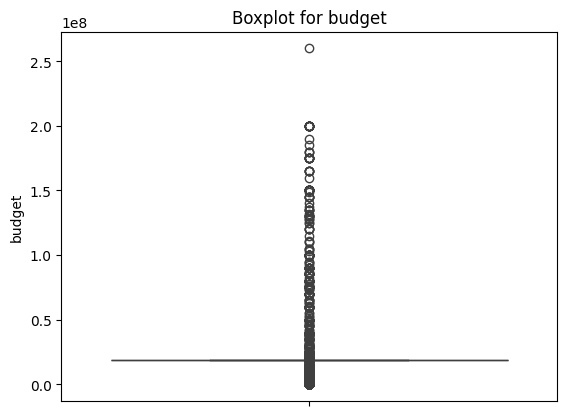

Q1 : 87997857.45636363 , Q4 : 1450026933.0


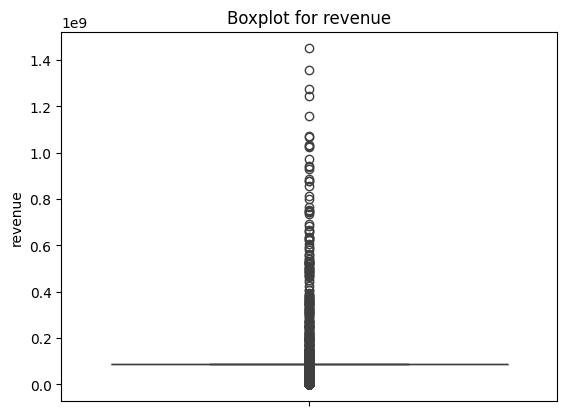

Q1 : 0.0008064516129032258 , Q4 : 1.0


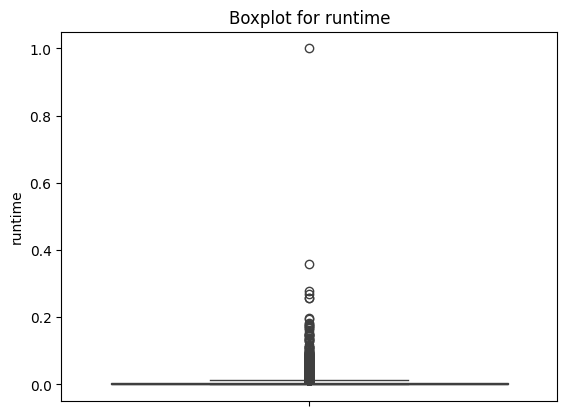

Q1 : 0.6186000835895753 , Q4 : 1.0


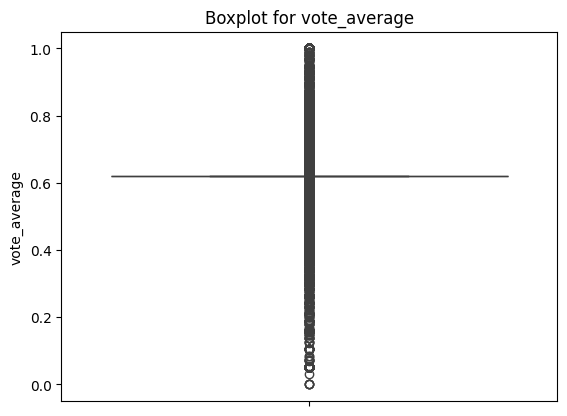

Q1 : 6.0 , Q4 : 19463.0


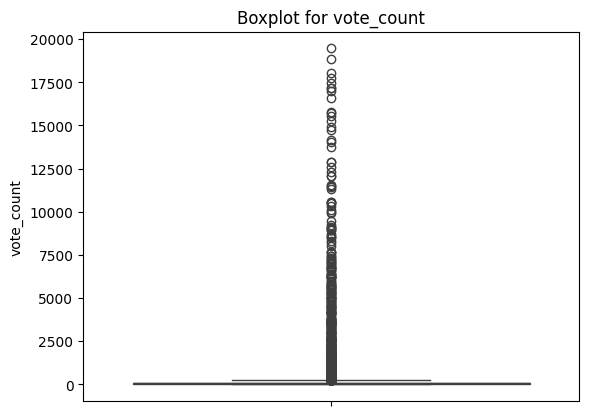

In [99]:
for column in numeric_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q4= df_clean[column].quantile(1)
    print(f"Q1 : {Q1} , Q4 : {Q4}")
    sns.boxplot(df_clean[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


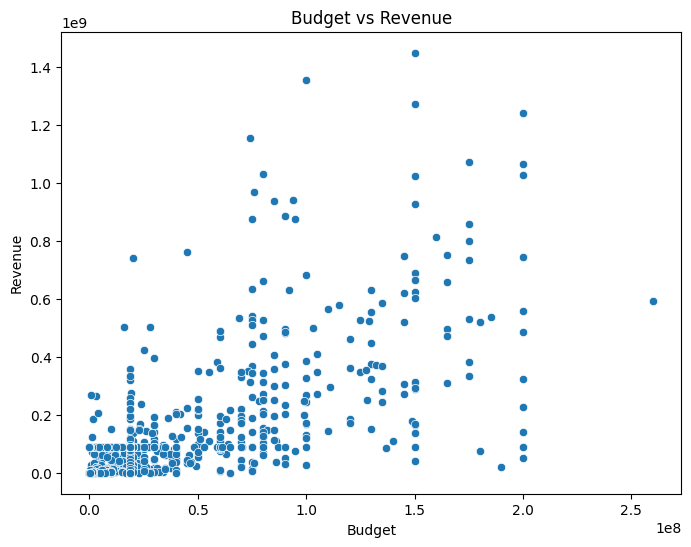

In [100]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df_clean)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [101]:
correlation = df_clean['budget'].corr(df_clean['revenue'])
print(f'Correlation between Budget and Revenue: {correlation}')

Correlation between Budget and Revenue: 0.6404117372783544


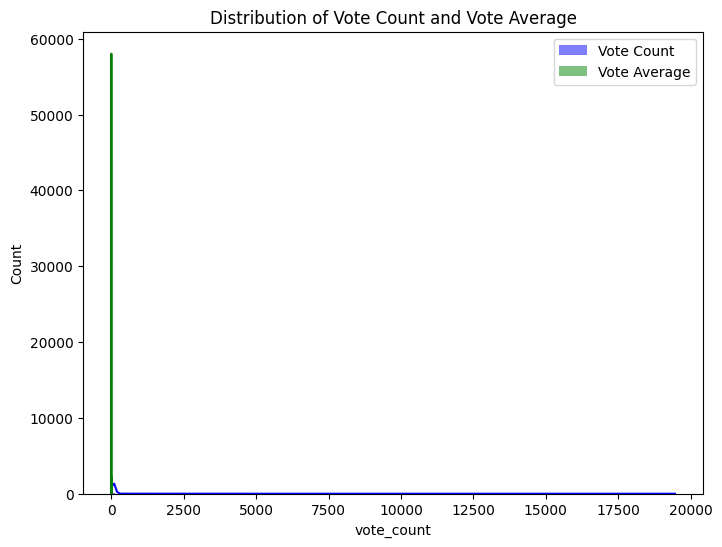

In [102]:
plt.figure(figsize=(8,6))
sns.histplot(df_clean['vote_count'], kde=True, color='blue', label='Vote Count')
sns.histplot(df_clean['vote_average'], kde=True, color='green', label='Vote Average')
plt.legend()
plt.title('Distribution of Vote Count and Vote Average')
plt.show()

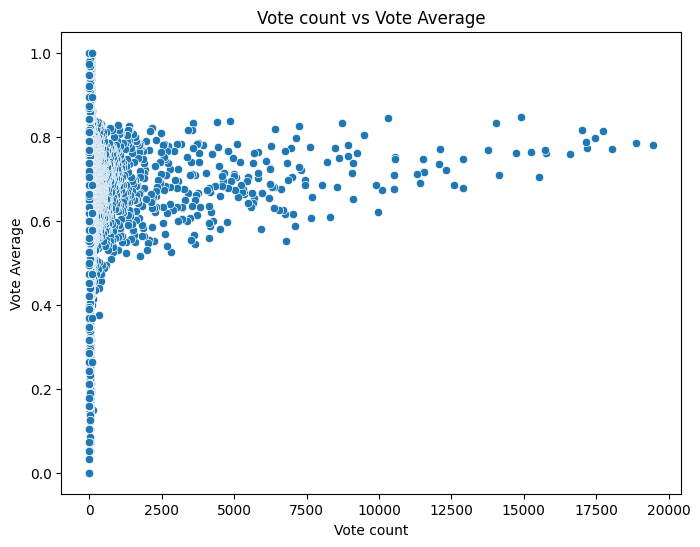

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='vote_count', y='vote_average', data=df_clean)
plt.title('Vote count vs Vote Average')
plt.xlabel('Vote count')
plt.ylabel('Vote Average')
plt.show()

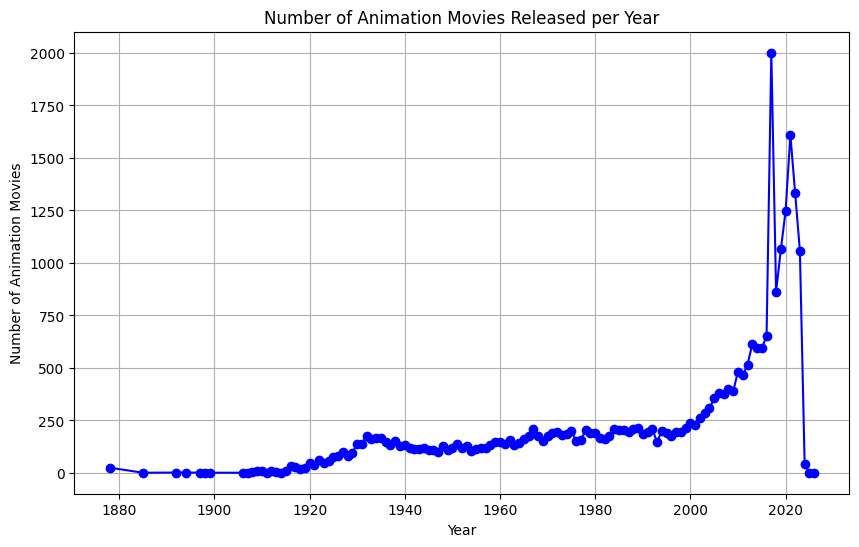

In [104]:

animation_movies = df_clean[df_clean['genres'] == 'Animation']  # فرض کنید ستون genre شامل نوع فیلم است

yearly_animation_counts = animation_movies.groupby('release_year').size()


plt.figure(figsize=(10, 6))
plt.plot(yearly_animation_counts.index, yearly_animation_counts.values, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Animation Movies')
plt.title('Number of Animation Movies Released per Year')
plt.grid(True)
plt.show()


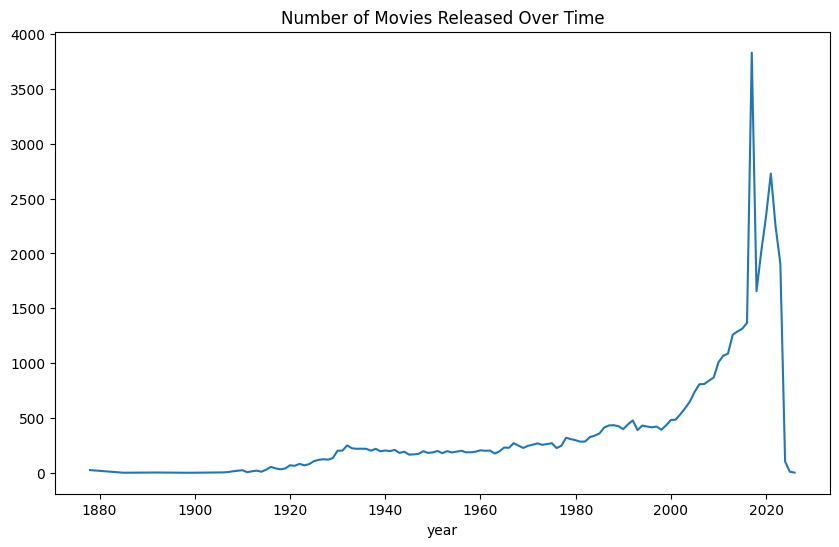

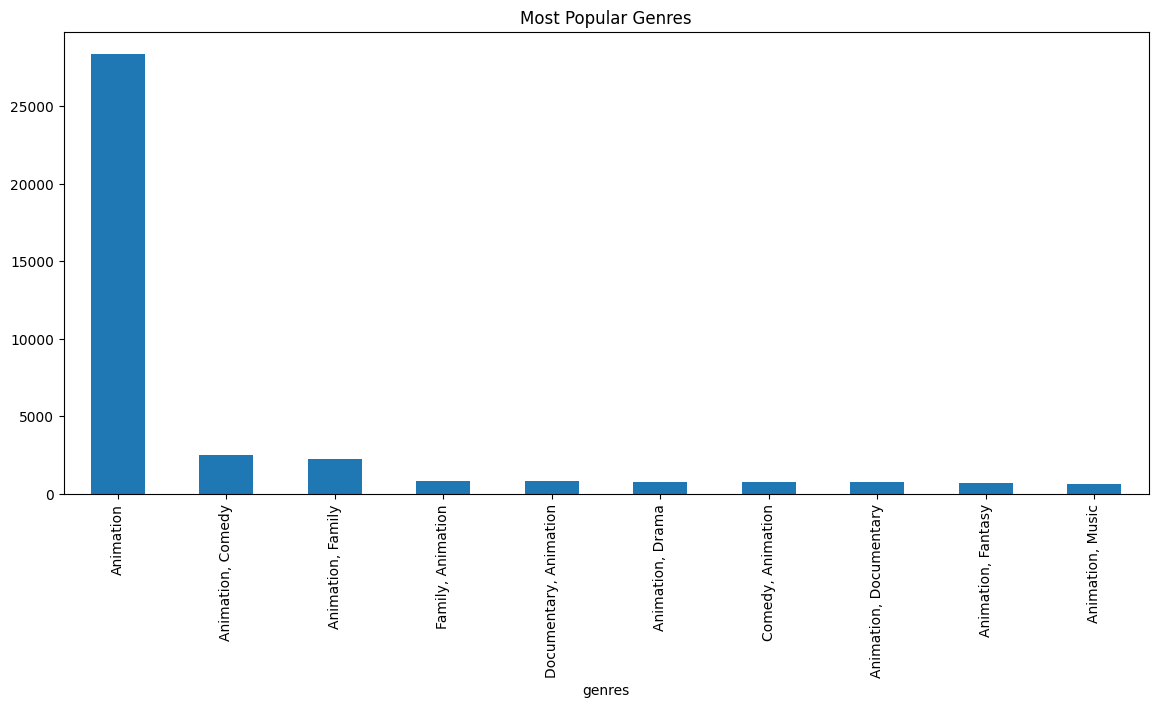

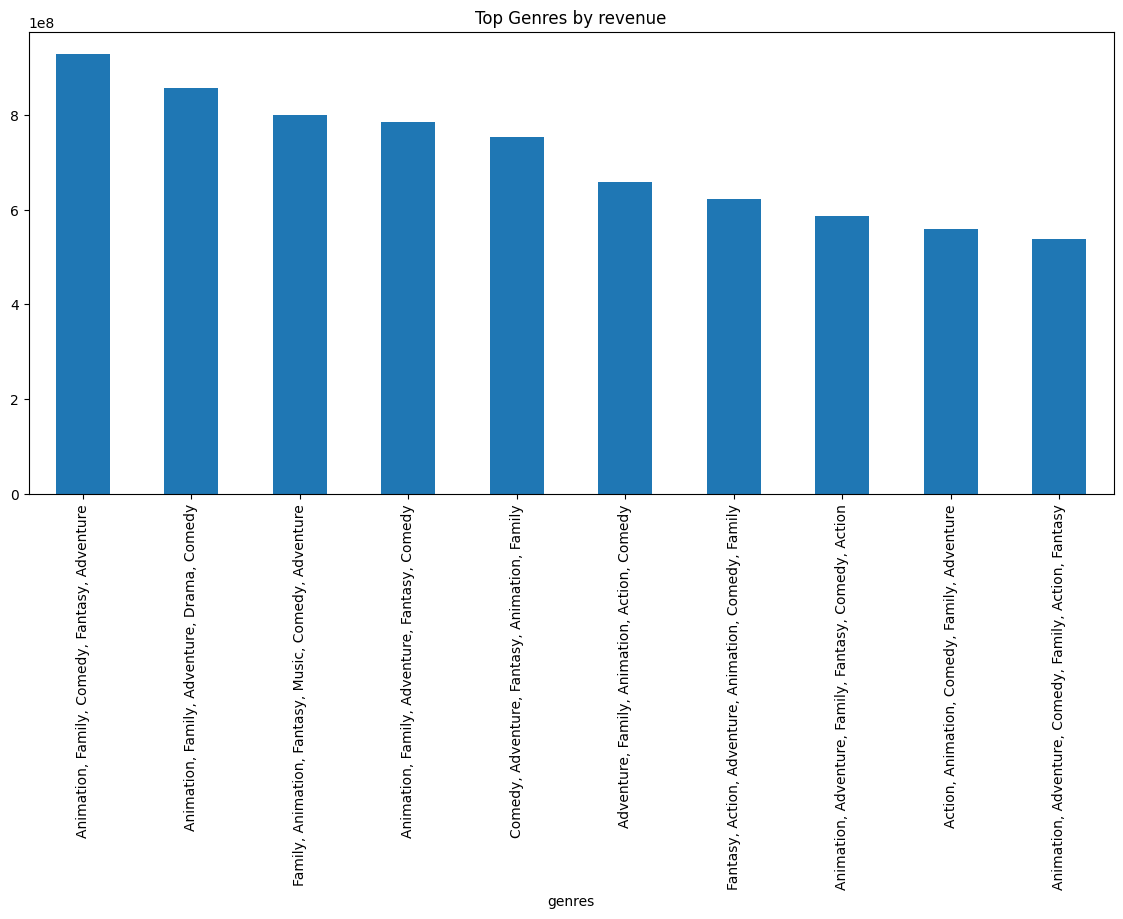

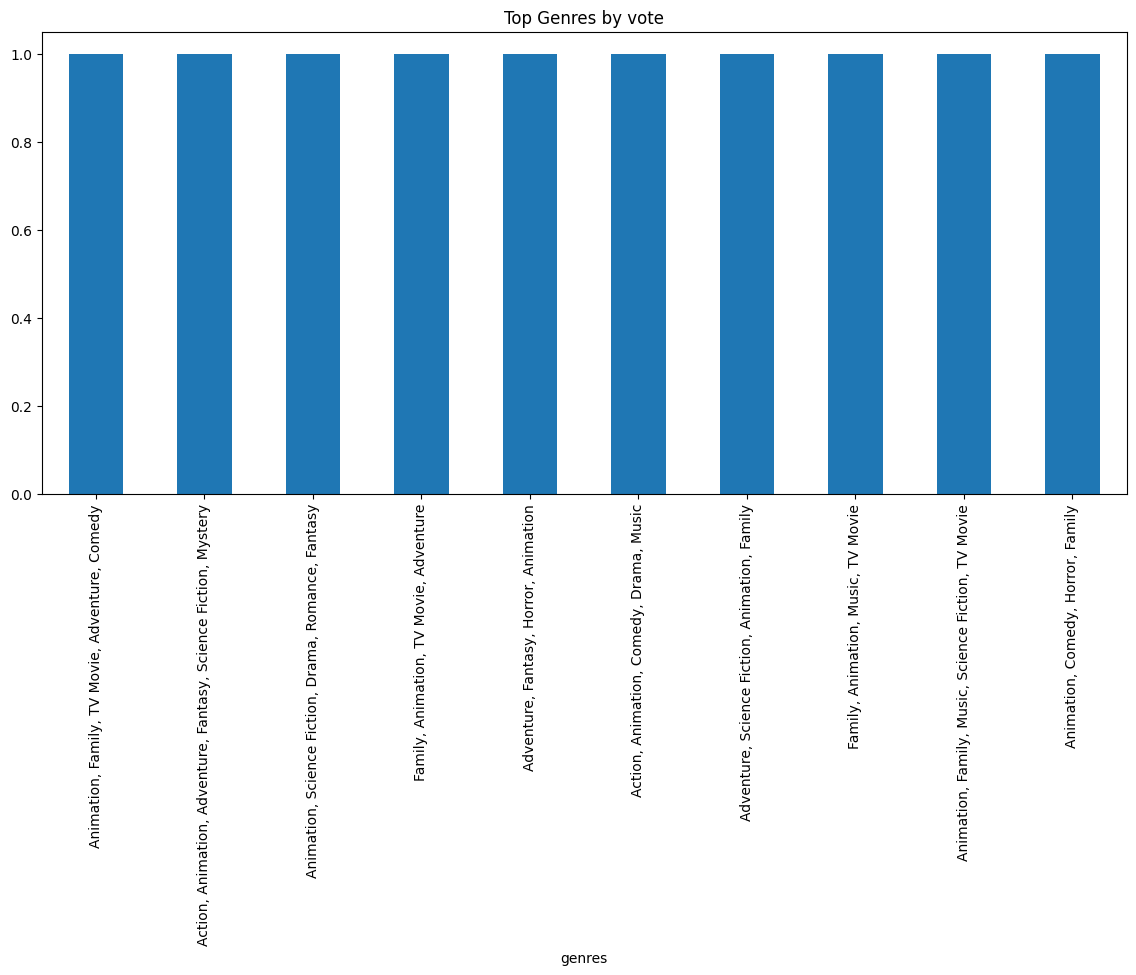

In [105]:
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
df_clean['year'] =df_clean['release_date'].dt.year

movies_per_year = df_clean.groupby('year').size()
movies_per_year.plot(kind='line', figsize=(10,6), title='Number of Movies Released Over Time')
plt.show()



genres_count = df_clean['genres'].str.split('|').explode().value_counts().head(10)

genres_count.plot(kind='bar', figsize=(14,6), title='Most Popular Genres')
plt.show()




top_revenue_genres = df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
top_vote_genres = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)

top_revenue_genres.plot(kind='bar', figsize=(14,6), title='Top Genres by revenue')
plt.show()

top_vote_genres.plot(kind='bar', figsize=(14,6), title='Top Genres by vote')
plt.show()




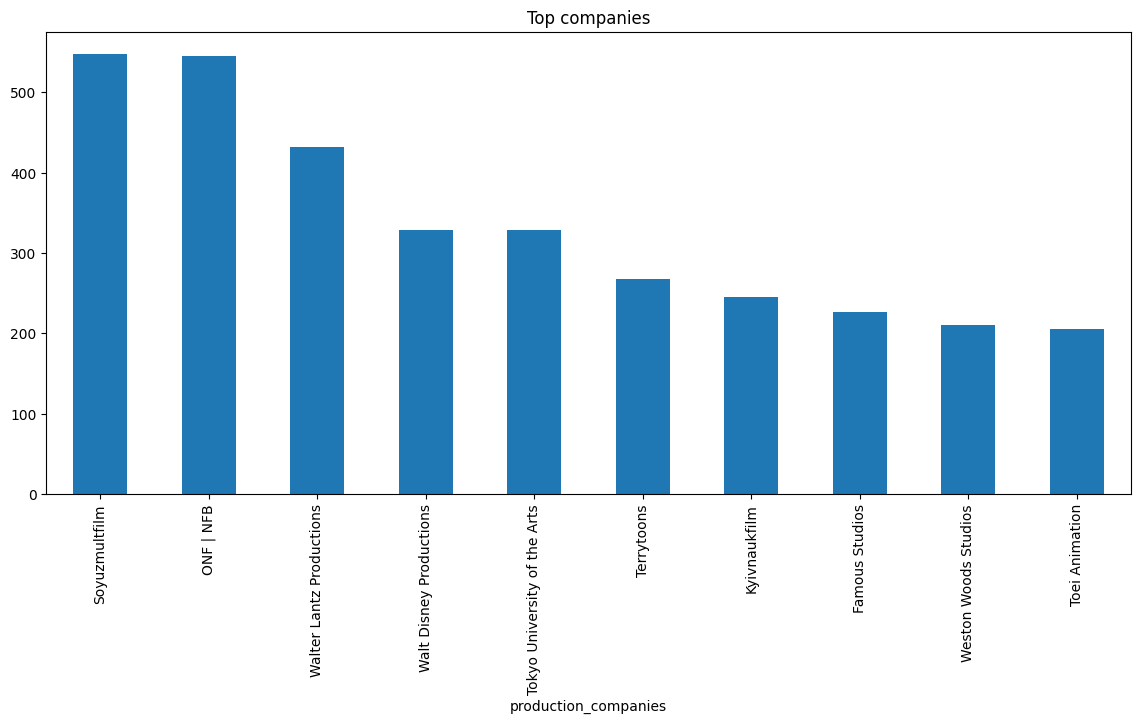

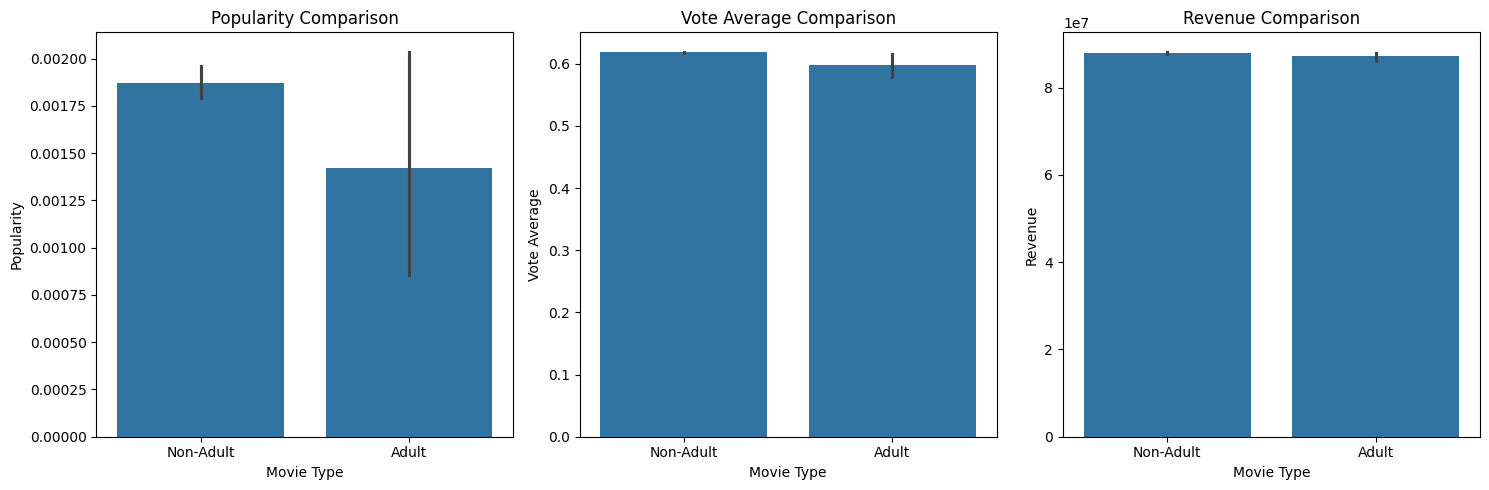

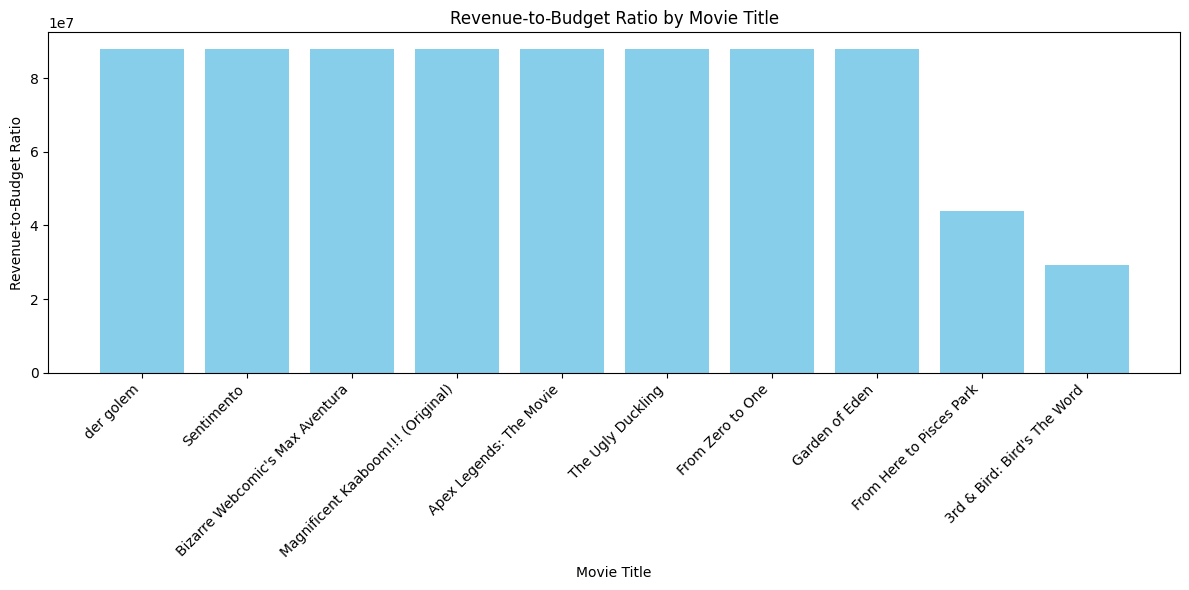

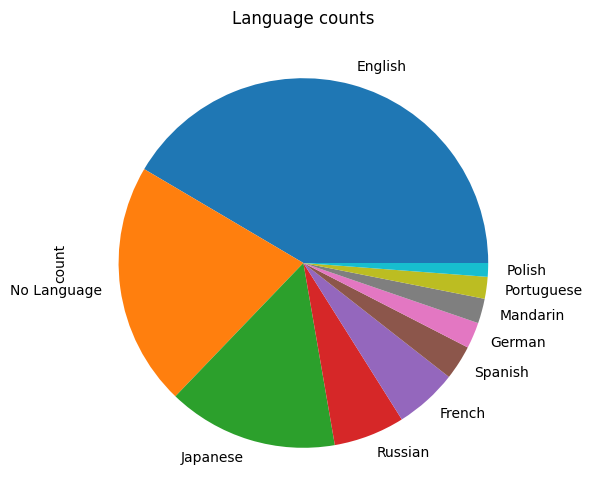

Top Companies with High Rating Movies:


production_companies
Soyuzmultfilm                   548
ONF | NFB                       545
Walter Lantz Productions        432
Walt Disney Productions         329
Tokyo University of the Arts    329
Terrytoons                      268
Kyivnaukfilm                    245
Famous Studios                  226
Weston Woods Studios            211
Toei Animation                  205
Name: count, dtype: int64


Success Metrics for High Rating Movies:


,title,popularity,vote_average,revenue
18695,Paw Patrol: Dino Rescue: Roar To The Rescue,0.001556,1.0,8.799786e+07
15626,PAW Patrol - Robo Dog Rescues!,0.002036,1.0,8.799786e+07
15612,Paper Birds,0.000595,1.0,8.799786e+07
18167,The Griffgons: In The Bakehouse,0.000595,1.0,8.799786e+07
18169,Merkabah: Voyage of a Star Seed,0.000595,1.0,8.799786e+07
18172,Daniel,0.001018,1.0,8.799786e+07
18174,Maturation,0.000000,1.0,1.000000e+00
18178,The Aalto Natives,0.000595,1.0,8.799786e+07
18179,Unicorn Boy,0.001679,1.0,8.799786e+07
15605,CarOuzel,0.000595,1.0,8.799786e+07



Most Common Languages in Movies:


spoken_languages
English        12005
No Language     6160
Japanese        4308
Russian         1797
French          1588
Spanish          872
German           660
Mandarin         625
Portuguese       553
Polish           346
Name: count, dtype: int64

In [106]:
high_rating_threshold = 0.6
high_rating_movies = df_clean[df_clean['vote_average'] >= high_rating_threshold]
top_companies = high_rating_movies['production_companies'].value_counts().head(10)

top_companies.plot(kind='bar', figsize=(14,6), title='Top companies')
plt.show()

high_rating_success = high_rating_movies[['title', 'popularity', 'vote_average', 'revenue']].sort_values(by=['vote_average'], ascending=[False]).head(10)

adult_movies = df_clean[df_clean['adult'] == True]
non_adult_movies = df_clean[df_clean['adult'] == False]

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.barplot(x='adult', y='popularity', data=df_clean)
plt.title('Popularity Comparison')
plt.xticks([0, 1], ['Non-Adult', 'Adult'])
plt.xlabel("Movie Type")
plt.ylabel("Popularity")


plt.subplot(1, 3, 2)
sns.barplot(x='adult', y='vote_average', data=df_clean)
plt.title('Vote Average Comparison')
plt.xticks([0, 1], ['Non-Adult', 'Adult'])
plt.xlabel("Movie Type")
plt.ylabel("Vote Average")


plt.subplot(1, 3, 3)
sns.barplot(x='adult', y='revenue', data=df_clean)
plt.title('Revenue Comparison')
plt.xticks([0, 1], ['Non-Adult', 'Adult'])
plt.xlabel("Movie Type")
plt.ylabel("Revenue")


plt.tight_layout()
plt.show()

df_clean['revenue_budget_ratio'] = df_clean['revenue'] / df_clean['budget']


data_sorted = df_clean.sort_values(by='revenue_budget_ratio', ascending=False)

top_movies = data_sorted.head(10)


plt.figure(figsize=(12, 6))
plt.bar(top_movies['title'], top_movies['revenue_budget_ratio'], color='skyblue')
plt.xticks(rotation=45, ha='right')  
plt.title('Revenue-to-Budget Ratio by Movie Title')
plt.xlabel('Movie Title')
plt.ylabel('Revenue-to-Budget Ratio')
plt.tight_layout()

plt.show()

language_counts = df_clean['spoken_languages'].value_counts().head(10)

language_counts.plot(kind='pie', figsize=(14,6), title='Language counts')
plt.show()



print("Top Companies with High Rating Movies:")
display(top_companies)

print("\nSuccess Metrics for High Rating Movies:")
display(high_rating_success)


print("\nMost Common Languages in Movies:")
display(language_counts)
